<a href="https://colab.research.google.com/github/NazaninSaadatMoghaddam1993/Titanik_kaggle_competition/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/titanik

/content/drive/MyDrive/titanik


In [4]:
data_f=pd.read_csv('train.csv')

In [5]:
data_f.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [6]:
data_f.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [19]:
nan_counts = data_f.isna().sum()
nan_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## There are multiple NaN values in the 'Age' and 'Cabin' columns, while the other columns do not experience this issue

In [20]:
data_f = data_f.fillna(data_f.mean())

<ipython-input-20-8de32dfdb91f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_f = data_f.fillna(data_f.mean())


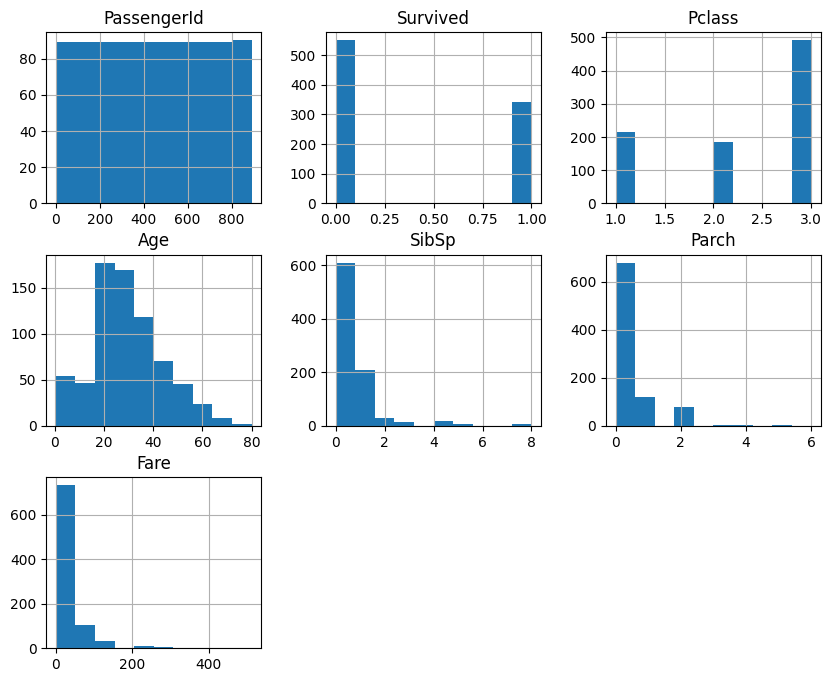

In [15]:
data_f.hist(figsize=(10, 8))
plt.show()

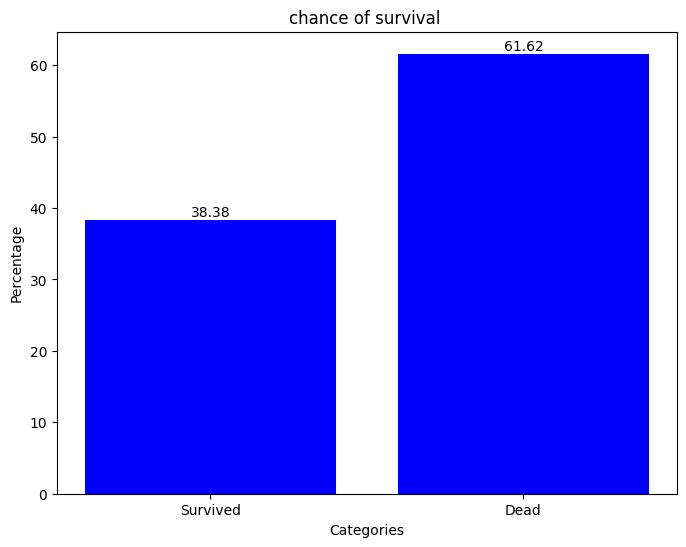

In [16]:
categories = ['Survived', 'Dead']
values = [len(data_f[data_f['Survived']==1]), len(data_f[data_f['Survived']==0])]  # These are counts or values, not percentages

# Calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color='blue')

# Add percentages as text on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('chance of survival ')

# Show the chart
plt.show()

#age

In [19]:
print('mean of age = ', np.mean(data_f['Age']))
print('max of age = ', np.max(data_f['Age']))
print('min of age = ', np.min(data_f['Age']))
print('std of age = ', np.std(data_f['Age']))

mean of age =  29.69911764705882
max of age =  80.0
min of age =  0.42
std of age =  14.516321150817316


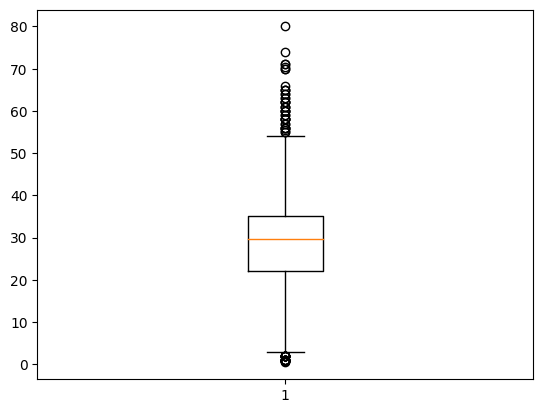

In [21]:
ar = data_f['Age'].values
plt.boxplot(ar)
plt
plt.show()

Text(0.5, 1.0, 'Distribution of age amonge dead')

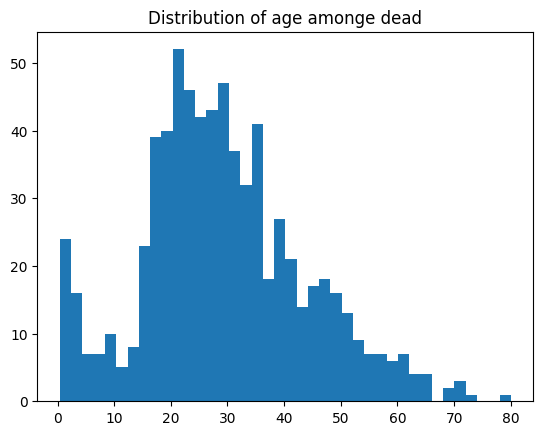

In [21]:
plt.hist(data_f['Age'],40)
plt.title("Distribution of age amonge dead")

Text(0.5, 1.0, 'Distribution of age amonge survived')

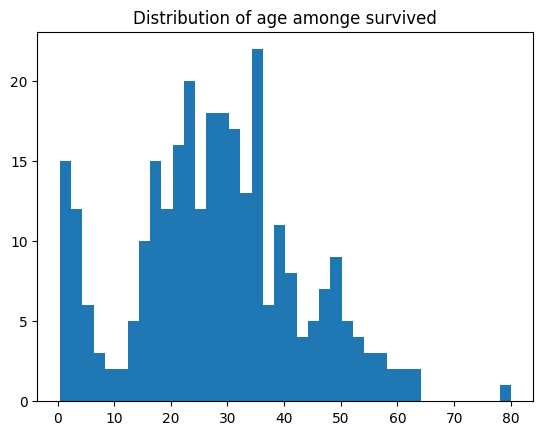

In [22]:
plt.hist(data_f[data_f['Survived']==1]['Age'],40)
plt.title("Distribution of age amonge survived")

#sex

ration of female in class 1 0.4351851851851852
ration of male in class 1 0.5648148148148148


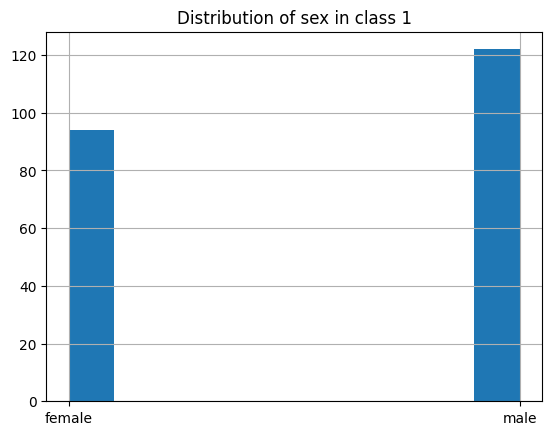

In [23]:
data_f[data_f['Pclass']==1]['Sex'].hist()
plt.title("Distribution of sex in class 1")
print('ration of female in class 1',len(data_f[(data_f['Pclass']==1)&(data_f['Sex']=='female')])/len(data_f[(data_f['Pclass']==1)]))
print('ration of male in class 1',len(data_f[(data_f['Pclass']==1)&(data_f['Sex']=='male')])/len(data_f[(data_f['Pclass']==1)]))

ration of female in class 2 0.41304347826086957
ration of male in class 2 0.5869565217391305


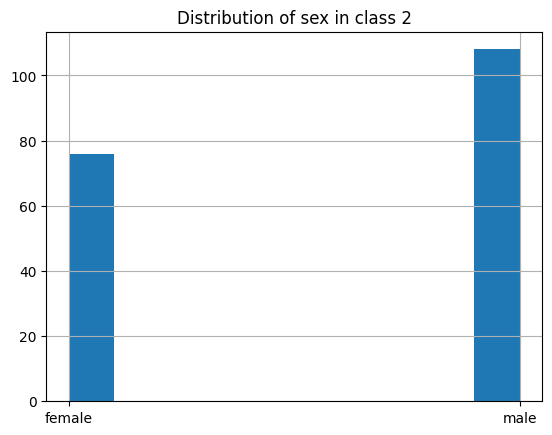

In [24]:
data_f[data_f['Pclass']==2]['Sex'].hist()
plt.title("Distribution of sex in class 2")
print('ration of female in class 2',len(data_f[(data_f['Pclass']==2)&(data_f['Sex']=='female')])/len(data_f[(data_f['Pclass']==2)]))
print('ration of male in class 2',len(data_f[(data_f['Pclass']==2)&(data_f['Sex']=='male')])/len(data_f[(data_f['Pclass']==2)]))

ration of female in class 3 0.29327902240325865
ration of male in class 3 0.7067209775967414


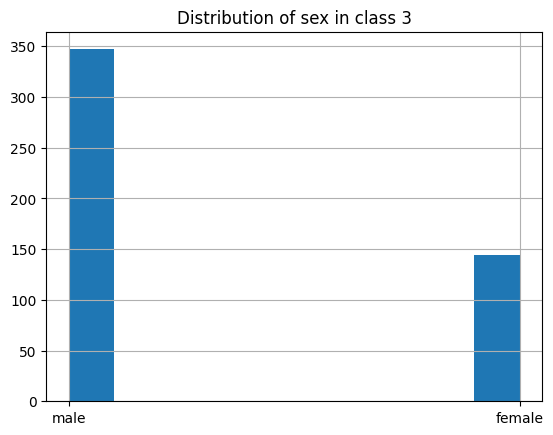

In [25]:
data_f[data_f['Pclass']==3]['Sex'].hist()
plt.title("Distribution of sex in class 3")
print('ration of female in class 3',len(data_f[(data_f['Pclass']==3)&(data_f['Sex']=='female')])/len(data_f[(data_f['Pclass']==3)]))
print('ration of male in class 3',len(data_f[(data_f['Pclass']==3)&(data_f['Sex']=='male')])/len(data_f[(data_f['Pclass']==3)]))

In [25]:
# print('mean of age of srvived = ', np.mean(data_f[data_f['Survived']==1]['Age']))
# print('max of age of srvived = ', np.max(data_f[data_f['Survived']==1]['Age']))
# print('min of age of srvived = ', np.min(data_f[data_f['Survived']==1]['Age']))
# print('std of age of srvived = ', np.std(data_f[data_f['Survived']==1]['Age']))

mean of age of srvived =  28.549778121775027
max of age of srvived =  80.0
min of age of srvived =  0.42
std of age of srvived =  13.752347699015184


## Mean for Age is 28.5

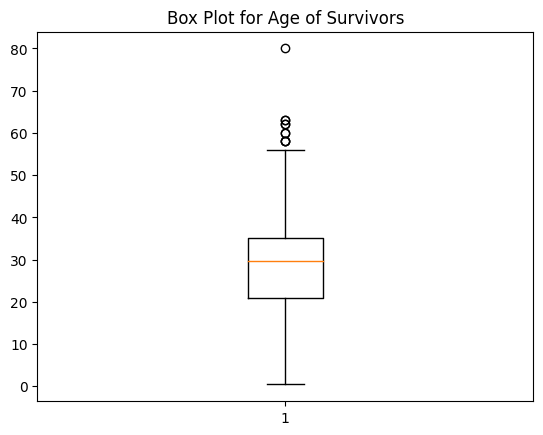

In [22]:
ar = data_f[data_f['Survived']==1]['Age'].values
plt.boxplot(ar)
plt.title('Box Plot for Age of Survivors')
plt.show()

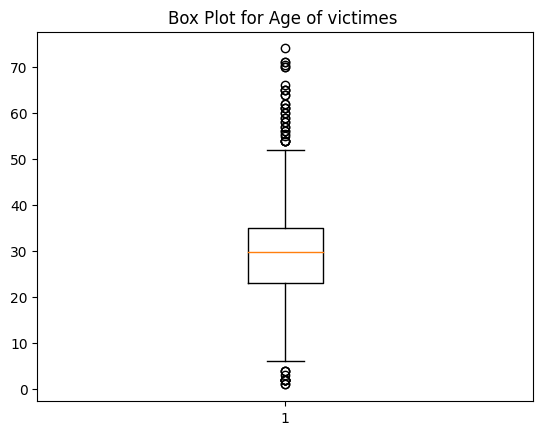

In [24]:
ar = data_f[data_f['Survived']==0]['Age'].values
plt.boxplot(ar)
plt.title('Box Plot for Age of victimes ')
plt.show()

#Pclass

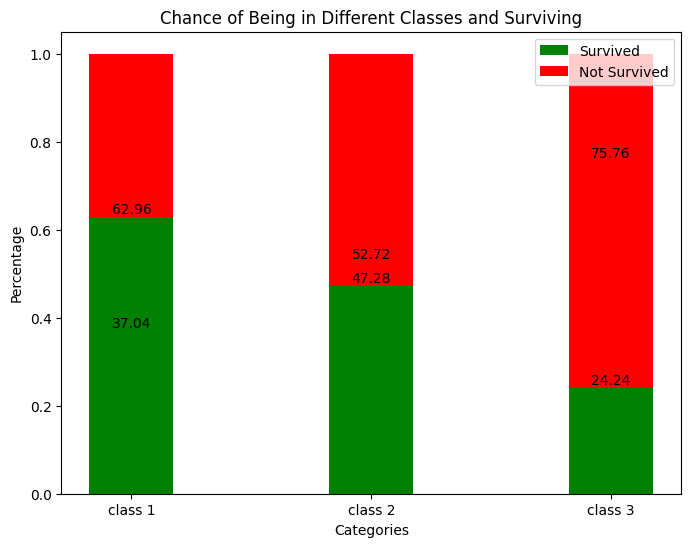

In [17]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['class 1', 'class 2', 'class 3']
survived_values = [
    len(data_f[(data_f['Pclass'] == 1) & (data_f['Survived'] == 1)]) / len(data_f[data_f['Pclass'] == 1]),
    len(data_f[(data_f['Pclass'] == 2) & (data_f['Survived'] == 1)]) / len(data_f[data_f['Pclass'] == 2]),
    len(data_f[(data_f['Pclass'] == 3) & (data_f['Survived'] == 1)]) / len(data_f[data_f['Pclass'] == 3])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Chance of Being in Different Classes and Surviving')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


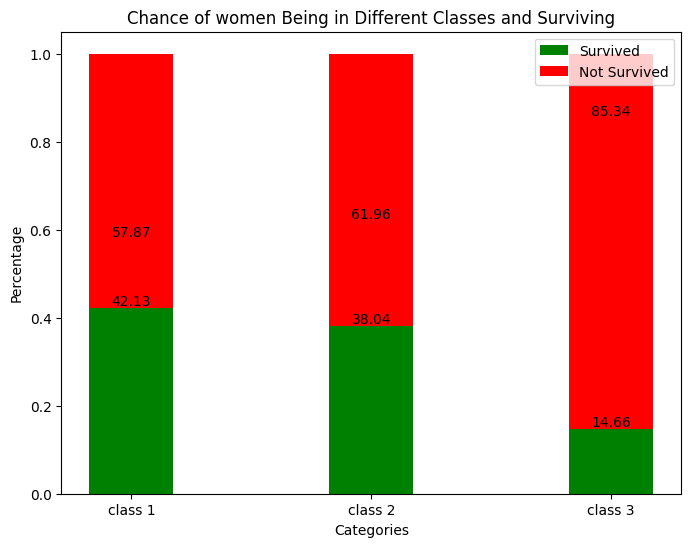

In [31]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['class 1', 'class 2', 'class 3']
survived_values = [
    len(data_f[(data_f['Pclass'] == 1) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'female')])/len(data_f[data_f['Pclass'] == 1]),
    len(data_f[(data_f['Pclass'] == 2) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'female')])/len(data_f[data_f['Pclass'] == 2]),
    len(data_f[(data_f['Pclass'] == 3) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'female')])/len(data_f[data_f['Pclass'] == 3])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Chance of women Being in Different Classes and Surviving')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


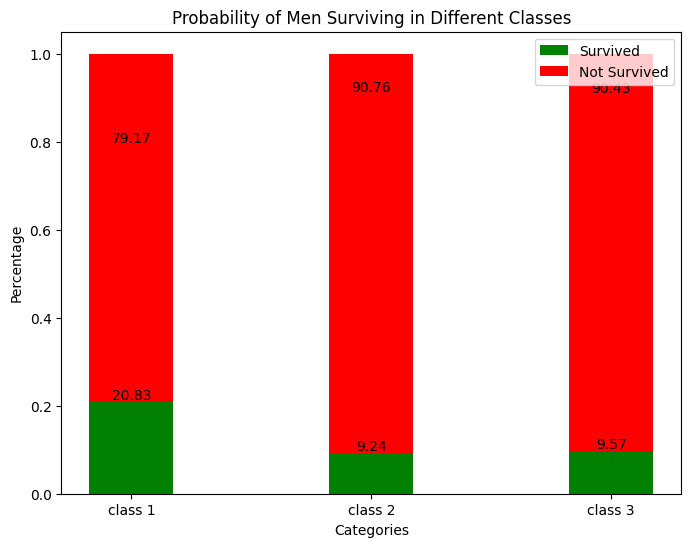

In [26]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['class 1', 'class 2', 'class 3']
survived_values = [
    len(data_f[(data_f['Pclass'] == 1) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'male')])/len(data_f[data_f['Pclass'] == 1]),
    len(data_f[(data_f['Pclass'] == 2) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'male')])/len(data_f[data_f['Pclass'] == 2]),
    len(data_f[(data_f['Pclass'] == 3) & (data_f['Survived'] == 1)&(data_f['Sex'] == 'male')])/len(data_f[data_f['Pclass'] == 3])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Probability of Men Surviving in Different Classes')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


#fare

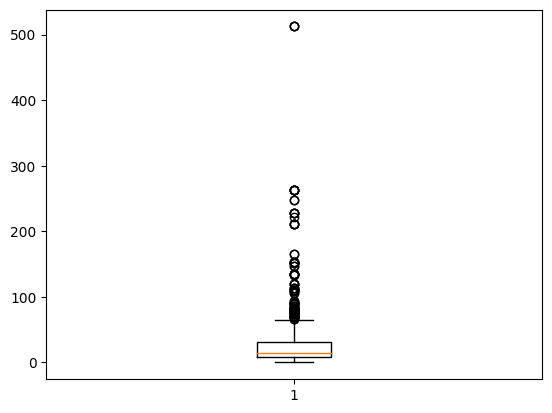

In [33]:
ar = data_f['Fare'].values
plt.boxplot(ar)
plt
plt.show()

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

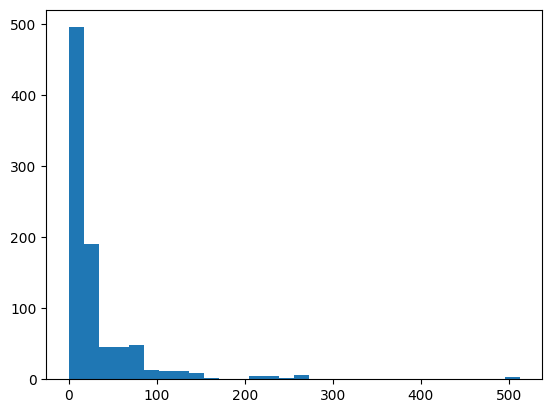

In [34]:
plt.hist(data_f['Fare'],30)

(array([ 15.,   2., 299.,  63.,  96.,  27.,  33.,  22.,  82.,  30.,  18.,
         14.,  15.,   4.,   0.,  10.,  15.,  10.,  13.,   4.,   3.,   2.,
         12.,   5.,   7.,  16.,   8.,   3.,   6.,   4.]),
 array([ 0.        ,  3.11666667,  6.23333333,  9.35      , 12.46666667,
        15.58333333, 18.7       , 21.81666667, 24.93333333, 28.05      ,
        31.16666667, 34.28333333, 37.4       , 40.51666667, 43.63333333,
        46.75      , 49.86666667, 52.98333333, 56.1       , 59.21666667,
        62.33333333, 65.45      , 68.56666667, 71.68333333, 74.8       ,
        77.91666667, 81.03333333, 84.15      , 87.26666667, 90.38333333,
        93.5       ]),
 <BarContainer object of 30 artists>)

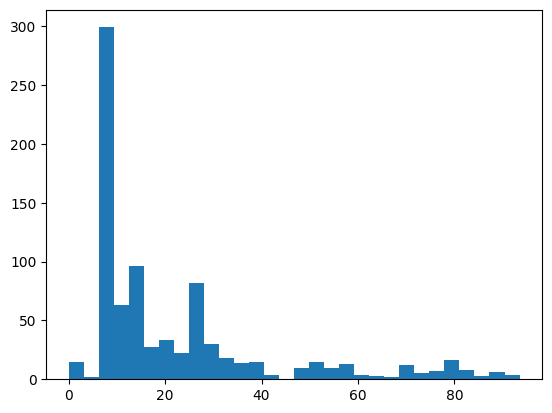

In [35]:
plt.hist(data_f[data_f['Fare']<100]['Fare'],30)

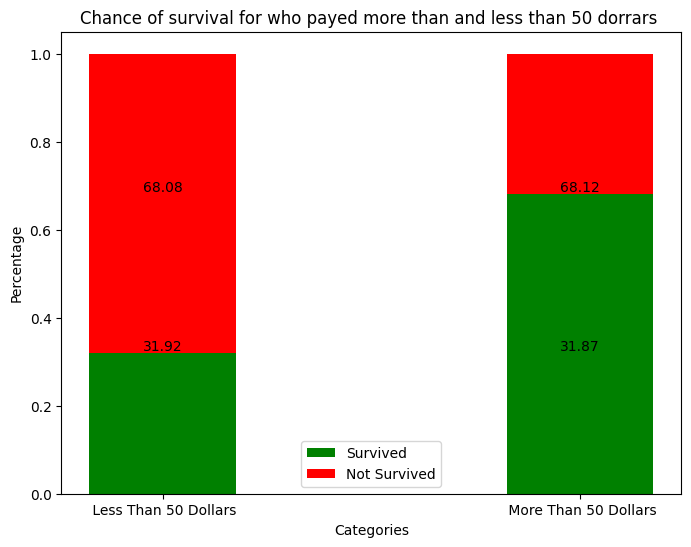

In [36]:
import matplotlib.pyplot as plt
import numpy as np

categories = [' Less Than 50 Dollars', ' More Than 50 Dollars']
survived_values = [
    len(data_f[(data_f['Fare']<50)&(data_f['Survived']==1)])/len(data_f[data_f['Fare']<50]),
    len(data_f[(data_f['Fare']>50)&(data_f['Survived']==1)])/len(data_f[data_f['Fare']>50])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Chance of survival for who payed more than and less than 50 dorrars ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


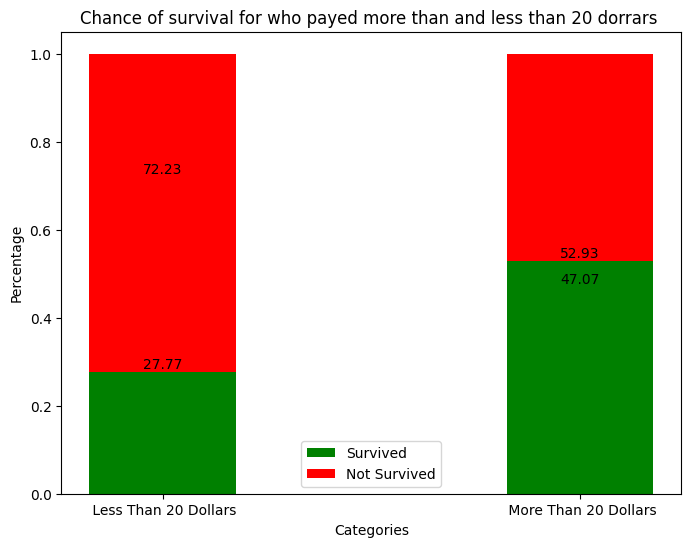

In [37]:
import matplotlib.pyplot as plt
import numpy as np

categories = [' Less Than 20 Dollars', ' More Than 20 Dollars']
survived_values = [
    len(data_f[(data_f['Fare']<20)&(data_f['Survived']==1)])/len(data_f[data_f['Fare']<20]),
    len(data_f[(data_f['Fare']>20)&(data_f['Survived']==1)])/len(data_f[data_f['Fare']>20])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Chance of survival for who payed more than and less than 20 dorrars ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


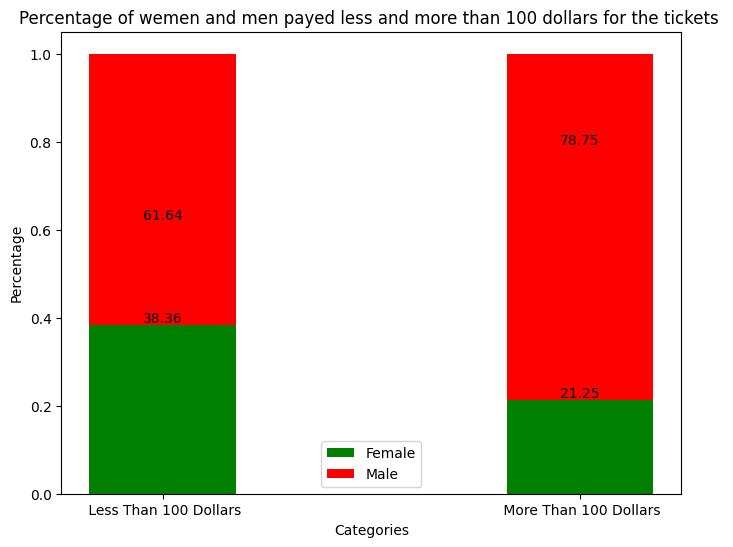

In [38]:
import matplotlib.pyplot as plt
import numpy as np

categories = [' Less Than 100 Dollars', ' More Than 100 Dollars']
survived_values = [
    len(data_f[(data_f['Fare']<100)&(data_f['Sex']=='female')])/len(data_f[data_f['Fare']<50]),
    len(data_f[(data_f['Fare']>100)&(data_f['Sex']=='female')])/len(data_f[data_f['Fare']>50])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Female', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Male', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of wemen and men payed less and more than 100 dollars for the tickets ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


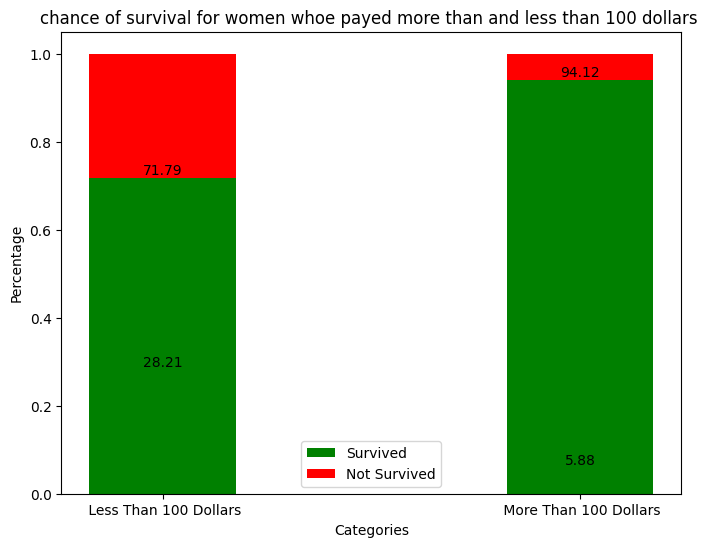

In [46]:
import matplotlib.pyplot as plt
import numpy as np

categories = [' Less Than 100 Dollars', ' More Than 100 Dollars']
survived_values = [
    len(data_f[(data_f['Fare']<100)&(data_f['Sex']=='female')&(data_f['Survived']==1)])/len(data_f[(data_f['Fare']<100)&(data_f['Sex']=='female')]),
    len(data_f[(data_f['Fare']>100)&(data_f['Sex']=='female')&(data_f['Survived']==1)])/len(data_f[(data_f['Fare']>100)&(data_f['Sex']=='female')])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('chance of survival for women whoe payed more than and less than 100 dollars ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


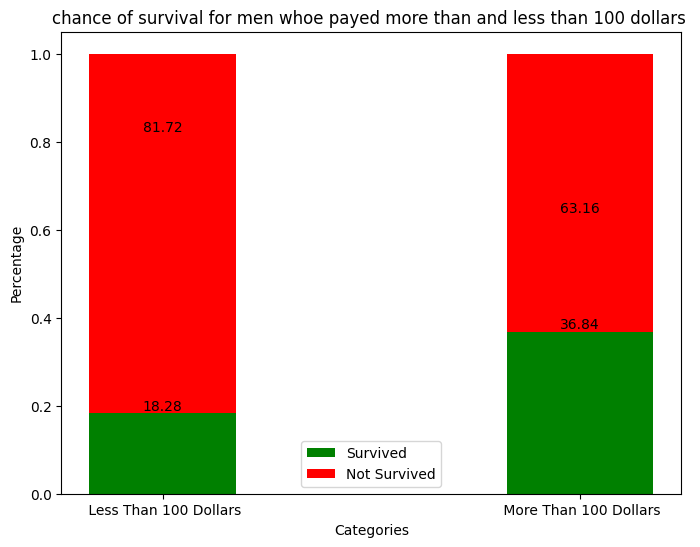

In [40]:
import matplotlib.pyplot as plt
import numpy as np

categories = [' Less Than 100 Dollars', ' More Than 100 Dollars']
survived_values = [
    len(data_f[(data_f['Fare']<100)&(data_f['Sex']=='male')&(data_f['Survived']==1)])/len(data_f[(data_f['Fare']<100)&(data_f['Sex']=='male')]),
    len(data_f[(data_f['Fare']>100)&(data_f['Sex']=='male')&(data_f['Survived']==1)])/len(data_f[(data_f['Fare']>100)&(data_f['Sex']=='male')])
]

not_survived_values = [1 - value for value in survived_values]  # Calculate percentage of non-survivors

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, survived_values, width, label='Survived', color='green')
bars2 = ax.bar(x, not_survived_values, width, label='Not Survived', color='red', bottom=survived_values)

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('chance of survival for men whoe payed more than and less than 100 dollars ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


# sibsp and parch

In [41]:
print('share of people how had siblings or spouses and survived',len(data_f[(data_f['SibSp']==1)&(data_f['Survived']==1)])/len(data_f[(data_f['SibSp']==1)]))

share of people how had siblings or spouses and survived 0.5358851674641149


Text(0.5, 1.0, 'people how had siblings or spouses on board')

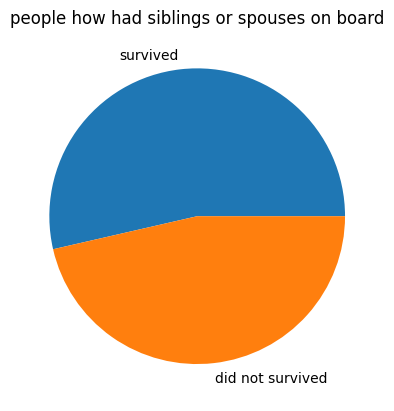

In [45]:
A = [len(data_f[(data_f['SibSp']==1)&(data_f['Survived']==1)]),len(data_f[(data_f['SibSp']==1)&(data_f['Survived']==0)])]
plt.pie(A,labels = ['survived','did not survived'])
plt.title('people how had siblings or spouses on board')

In [42]:
print('share of people how had parents or children and survived',len(data_f[(data_f['Parch']==1)&(data_f['Survived']==1)])/len(data_f[(data_f['Parch']==1)]))

share of people how had parents or children and survived 0.5508474576271186


Text(0.5, 1.0, 'share of people how had parents or children and survived')

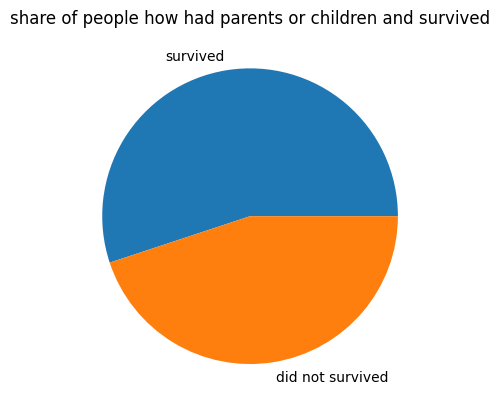

In [43]:
A = [len(data_f[(data_f['Parch']==1)&(data_f['Survived']==1)]),len(data_f[(data_f['Parch']==1)&(data_f['Survived']==0)])]
plt.pie(A,labels = ['survived','did not survived'])
plt.title('share of people how had parents or children and survived')

In [ ]:
print('share of people how had siblings or spouse or parents or children and survived',len(data_f[(data_f['SibSp']==1)|(data_f['Parch']==1)&(data_f['Survived']==1)])/len(data_f[(data_f['Parch']==  1)|(data_f['SibSp']==1)]))

share of people how had siblings or spouse or parents or children and survived 0.8888888888888888


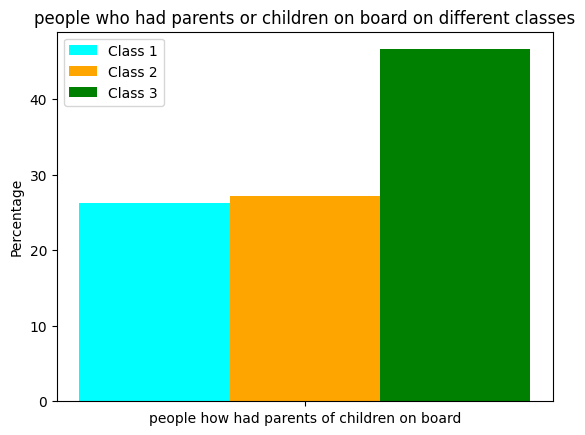

In [14]:
x = np.arange(1)
y1 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==1)])/len(data_f[(data_f['Parch']==1)])*100]
y2 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==2)])/len(data_f[(data_f['Parch']==1)])*100]
y3 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==3)])/len(data_f[(data_f['Parch']==1)])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['people how had parents of children on board'])
plt.title('people who had parents or children on board on different classes')
# plt.xlabel("people who had parents or children on board on different classes","")
plt.ylabel("Percentage")
plt.legend(["Class 1", "Class 2", "Class 3"])
plt.show()

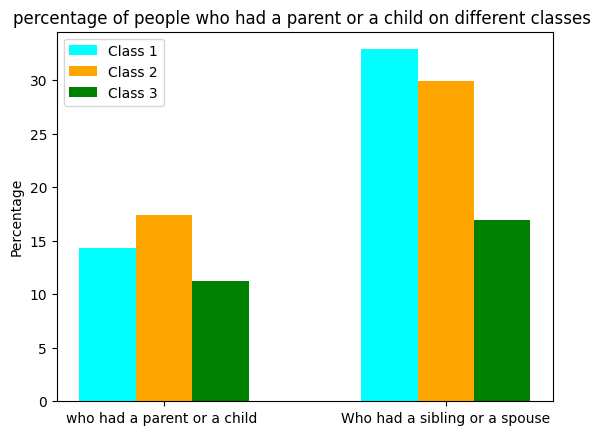

In [9]:
x = np.arange(2)
y1 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['SibSp']==1)&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100]
y2 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['SibSp']==1)&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100]
y3 = [len(data_f[(data_f['Parch']==1)&(data_f['Pclass']==3)])/len(data_f[(data_f['Pclass']==3)])*100,len(data_f[(data_f['SibSp']==1)&(data_f['Pclass']==3)])/len(data_f[(data_f['Pclass']==3)])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ["who had a parent or a child ","Who had a sibling or a spouse"])
plt.title('percentage of people who had a parent or a child on different classes ')
plt.ylabel("Percentage")
plt.legend(["Class 1", "Class 2", "Class 3"])
plt.show()

# embarked

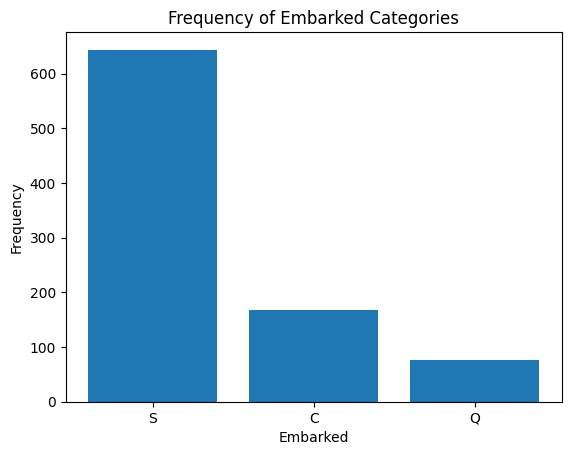

In [ ]:
embarked_counts = data_f['Embarked'].value_counts()
plt.bar(embarked_counts.index, embarked_counts)
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Frequency of Embarked Categories')
plt.show()

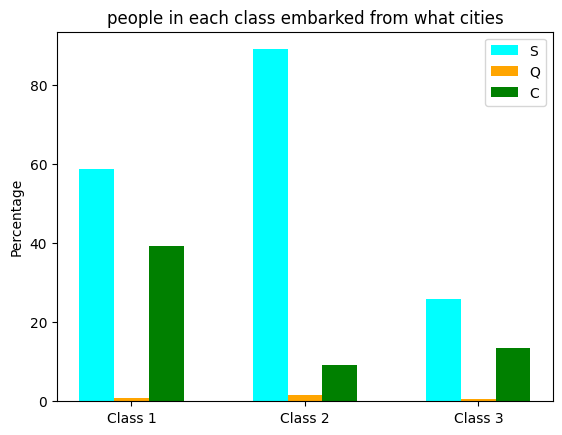

In [15]:
x = np.arange(3)
y1 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==3)])*100]
y2 = [len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==3)])*100]
y3 = [len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==1)])/len(data_f[(data_f['Pclass']==1)])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==2)])/len(data_f[(data_f['Pclass']==2)])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==3)])/len(data_f[(data_f['Pclass']==3)])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ["Class 1", "Class 2", "Class 3"])
plt.title('people in each class embarked from what cities')
plt.ylabel("Percentage")
plt.legend(["S","Q","C"])
plt.show()

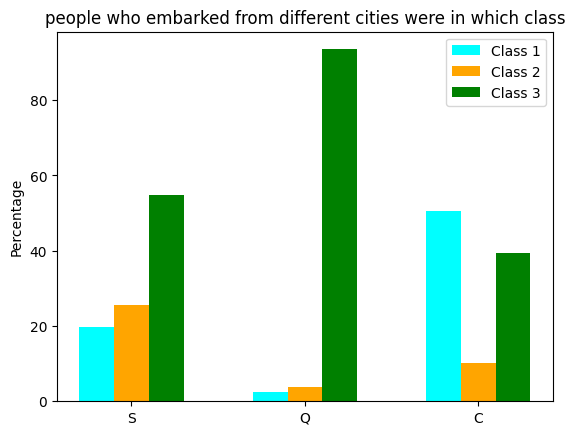

In [13]:
x = np.arange(3)
y1 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==1)])/len(data_f[(data_f['Embarked']=='S')])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==1)])/len(data_f[(data_f['Embarked']=='Q')])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==1)])/len(data_f[(data_f['Embarked']=='C')])*100]
y2 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==2)])/len(data_f[(data_f['Embarked']=='S')])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==2)])/len(data_f[(data_f['Embarked']=='Q')])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==2)])/len(data_f[(data_f['Embarked']=='C')])*100]
y3 = [len(data_f[(data_f['Embarked']=='S')&(data_f['Pclass']==3)])/len(data_f[(data_f['Embarked']=='S')])*100,len(data_f[(data_f['Embarked']=='Q')&(data_f['Pclass']==3)])/len(data_f[(data_f['Embarked']=='Q')])*100,len(data_f[(data_f['Embarked']=='C')&(data_f['Pclass']==3)])/len(data_f[(data_f['Embarked']=='C')])*100]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ["S","Q","C"])
plt.title('people who embarked from different cities were in which class')
plt.ylabel("Percentage")
plt.legend(["Class 1", "Class 2", "Class 3"])
plt.show()

In [ ]:
data_f=data_f.replace('female',1)

In [ ]:
data_f=data_f.replace('male',0)

<ipython-input-45-4e830970f2ea>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_f.corr()


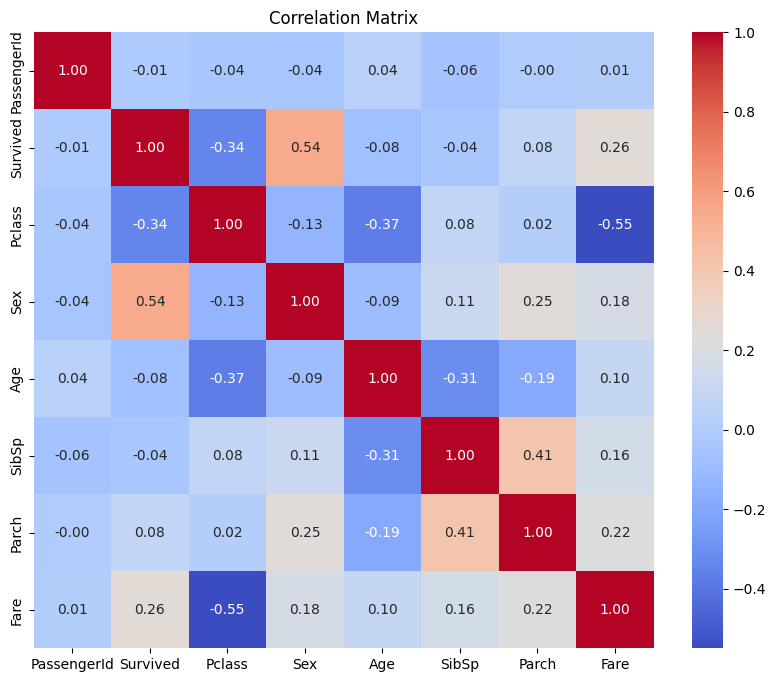

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df should contain the variables you want to calculate correlations for

# Calculate correlation matrix
corr = data_f.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


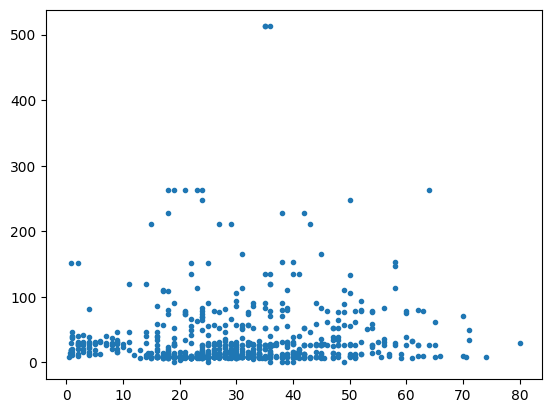

In [ ]:
plt.plot(data_f['Age'],data_f['Fare'],'.')
# plt.xscale('log')